## Retrieval augmented generation

In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution.

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc).
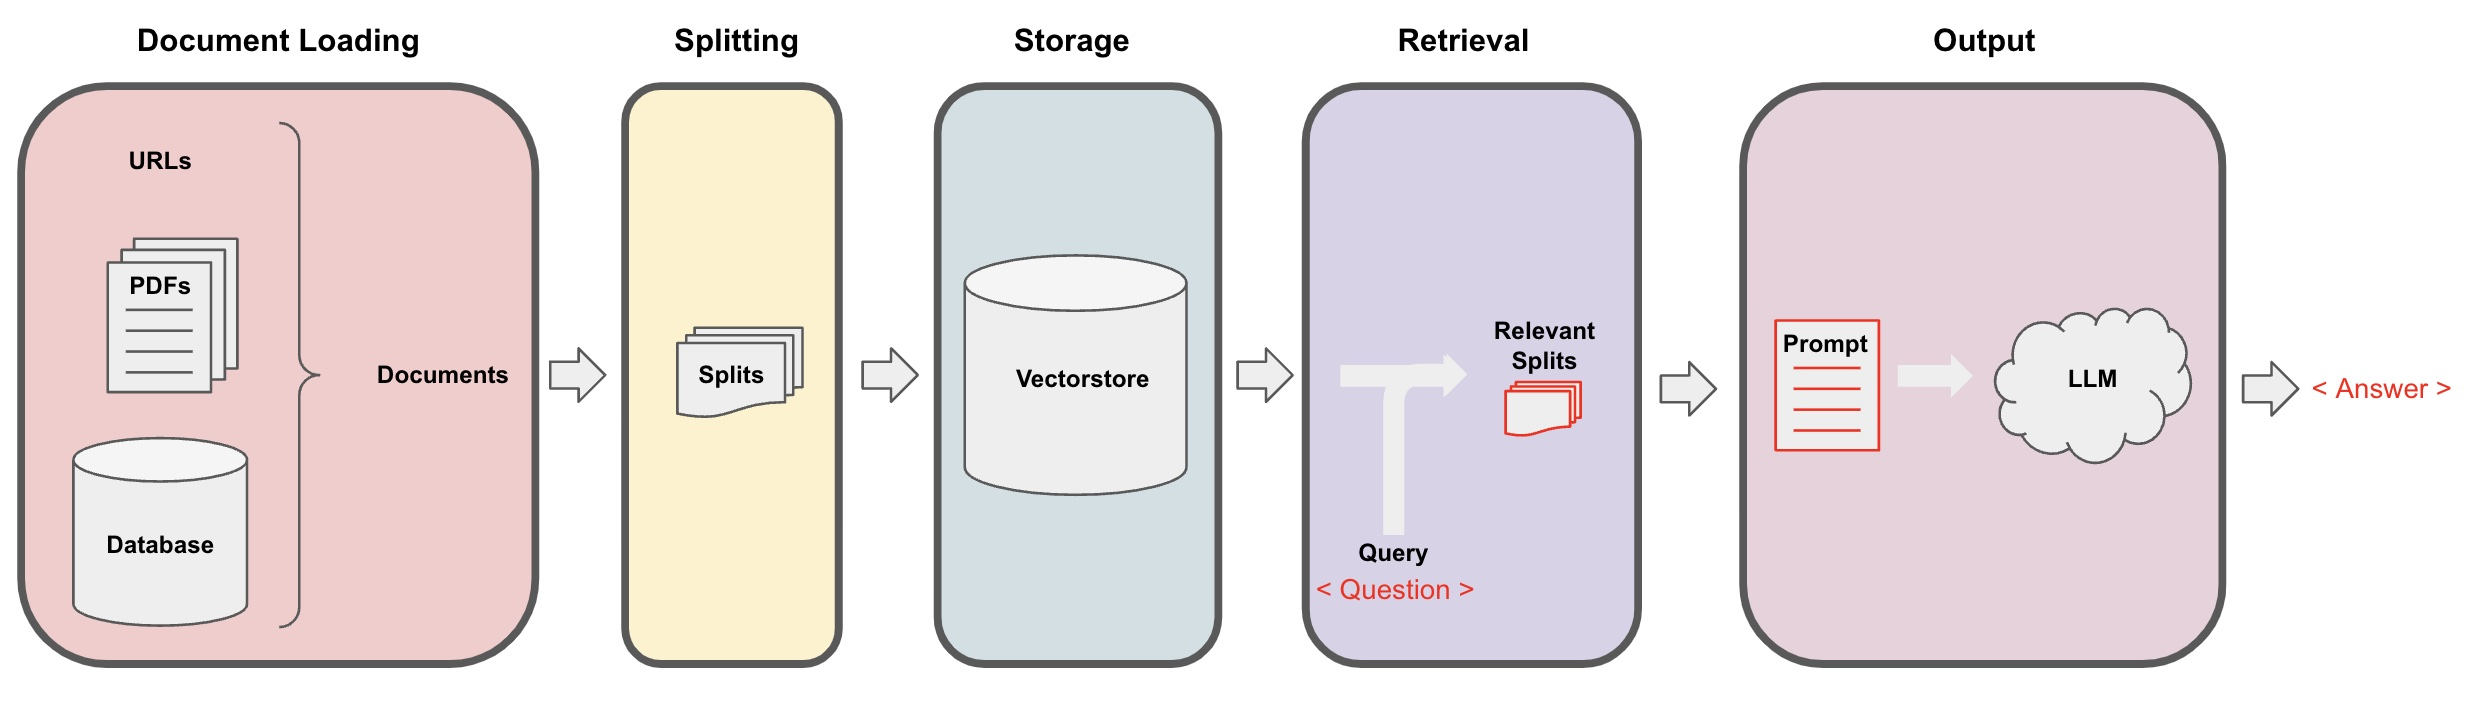

## Loaders

Loaders handle the specifics of accessing and converting data. They support:

**Accessing:**
- Websites
- Databases
- YouTube
- ArXiv, etc.

**Data Types:**
- PDF
- HTML
- JSON
- Word
- PowerPoint, etc.

They return a list of `Document` objects, formatted as follows:

```python
[
    Document(page_content="This is doc", metadata={"source": "https://example.com", "page": 0})
]
```
More About loaders in [langchain documentation](https://python.langchain.com/v0.2/docs/integrations/document_loaders/)

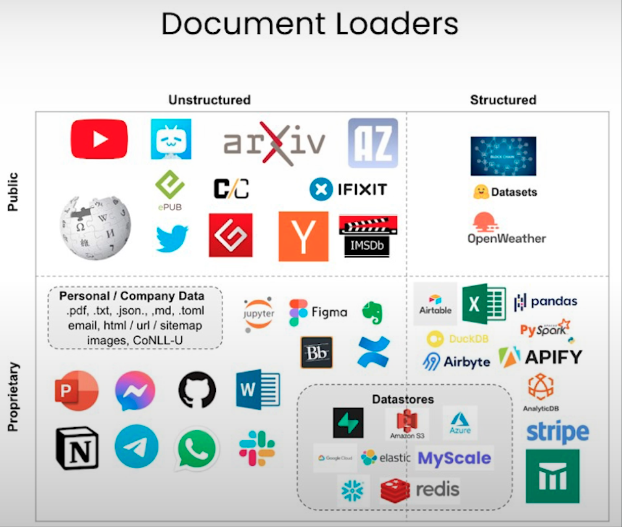

In [2]:
%pip install langchain langchain_community langchain-openai -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.5/973.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00


### PDFs
Lets load a PDF from the arxiv. First dowload [RAFT: Adapting Language Model to Domain Specific RAG](https://arxiv.org/pdf/2403.10131) and  load using pdf loader.

In [3]:
!wget https://arxiv.org/pdf/2403.10131 -O raft.pdf

--2024-05-24 18:52:01--  https://arxiv.org/pdf/2403.10131
Resolving arxiv.org (arxiv.org)... 151.101.67.42, 151.101.195.42, 151.101.3.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 801818 (783K) [application/pdf]
Saving to: ‘raft.pdf’

raft.pdf            100%[===================>] 783.03K  --.-KB/s    in 0.06s   

2024-05-24 18:52:02 (12.9 MB/s) - ‘raft.pdf’ saved [801818/801818]



In [4]:
# Install the libvrary needed for PDF loader
!pip install pypdf -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 1.8 MB/s eta 0:00:00


In [5]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("raft.pdf")
pdf_pages = loader.load()

Each page in a PDF is `Document`.
A `Document` contains text (`page_content`) and `metadata`

In [6]:
print(">>> Total page in pdf: ", len(pdf_pages))
print("-"*100)
# lets see page content
page = pdf_pages[0]
print(page.page_content[0:500])
print(">>> Page Metadata: ", page.metadata)

>>> Total page in pdf:  11
----------------------------------------------------------------------------------------------------
RAFT: Adapting Language Model to Domain Specific RAG
Tianjun Zhang Shishir G. Patil Naman Jain Sheng Shen Matei Zaharia Ion Stoica Joseph E. Gonzalez
tianjunz@berkeley.edu, shishirpatil@berkeley.edu
UC Berkeley
Abstract
Pretraining Large Language Models (LLMs) on
large corpora of textual data is now a standard
paradigm. When using these LLMs for many
downstream applications, it is common to ad-
ditionally bake in new knowledge (e.g., time-
critical news, or private domain knowledge) into
the pre
>>> Page Metadata:  {'source': 'raft.pdf', 'page': 0}


### YouTube

In many YouTube videos, transcripts may not be available, and the auto-generated transcripts by YouTube might not be accurate. To achieve better accuracy, you can download the video audio and convert it into a transcript using the following code:

```python
url = "https://youtu.be/zZasH6qkn8M?si=cEAFEN7gRZH68QUw"
save_dir = "docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url], save_dir),
    OpenAIWhisperParser()
)
docs = loader.load()
```

In [7]:
##### install necessary library needed for YoutubeAudioLoader
##### need model to convert audio into the text
# %pip install yt_dlp -q
##### install the library to get youtube-transcript-loader
%pip install --quiet  youtube-transcript-api
##### to get tghe info about video using youtube-transcript-loader
%pip install pytube -q
%pip install pydub -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 478.8 kB/s eta 0:00:00


In [8]:
from langchain_community.document_loaders.generic import GenericLoader
# from langchain_community.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

# for generating the transcript
from langchain_community.document_loaders import YoutubeLoader
from langchain_community.document_loaders.parsers import OpenAIWhisperParser

In [9]:
loader = YoutubeLoader.from_youtube_url(
    "https://youtu.be/Y0Oa4Lp5fLE?si=XPFVAw3xLx5HwpEP", add_video_info=True
)
yt_data = loader.load()
print(len(yt_data))

1


### URLs

In [10]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://github.com/AI-in-Health/MedLLMsPracticalGuide/blob/main/README.md")
web_data = loader.load()

In [11]:
print(">>> Total pages loaded: ", len(web_data))
print(">>> Data metadata: ", web_data[0].metadata)

print(">>> Web Page content: \n")
web_data[0].page_content[:500]

>>> Total pages loaded:  1
>>> Data metadata:  {'source': 'https://github.com/AI-in-Health/MedLLMsPracticalGuide/blob/main/README.md', 'title': 'MedLLMsPracticalGuide/README.md at main ¬∑ AI-in-Health/MedLLMsPracticalGuide ¬∑ GitHub', 'description': 'A curated list of practical guide resources of Medical LLMs (Medical LLMs Tree, Tables, and Papers) - MedLLMsPracticalGuide/README.md at main ¬∑ AI-in-Health/MedLLMsPracticalGuide', 'language': 'en'}
>>> Web Page content: 



'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMedLLMsPracticalGuide/README.md at main ¬∑ AI-in-Health/MedLLMsPracticalGuide ¬∑ GitHub\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\nNavigation Menu\n\nToggle navigation\n\n\n\n\n\n\n\n\n\n\n          Sign in\n        \n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n        Product\n        \n\n\n\n\n\n\n\n\n\n\n\n\nActions\n        Automate any workflow\n      \n\n\n\n\n\n\n\nPackages\n        Host and manage packages\n      \n\n\n\n\n\n\n\nSecurity\n        Find '

### Notion


In [12]:
from langchain_community.document_loaders import NotionDirectoryLoader

loader  = NotionDirectoryLoader("/content")
notion_docs = loader.load()

In [13]:
print(">>> Total notion Docs: ", len(notion_docs))
print(">>> Doc metadata: ", notion_docs[0].metadata)
print(">>> Doc page content: ")
notion_docs[0].page_content[:500]

>>> Total notion Docs:  1
>>> Doc metadata:  {'source': '/content/sample_data/README.md'}
>>> Doc page content: 


'This directory includes a few sample datasets to get you started.\n\n*   `california_housing_data*.csv` is California housing data from the 1990 US\n    Census; more information is available at:\n    https://developers.google.com/machine-learning/crash-course/california-housing-data-description\n\n*   `mnist_*.csv` is a small sample of the\n    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is\n    described at: http://yann.lecun.com/exdb/mnist/\n\n*   `anscombe.json` contains a cop'

## Document Splitting

Document Splitting is a crucial part of constructing a Retrieval-Augmented Generation (RAG) application. This step is essential to ensure that meaningful relationships within the document are maintained after splitting.

For example, consider the following text:
```bash
...
on this model. The Toyota Camry has a head-snapping
80HP and an eight-speed automatic transmission that will
...
```

If we split the text into chunks as follows:
```bash
Chunk 1: on this model. The Toyota Camry has a head-snapping
```
```bash
Chunk 2: 80HP and an eight-speed automatic transmission that will
```

If a user asks the question: `What are the specifications of the Camry?`, the model cannot answer the question accurately using only the retrieved Chunk 1. The information is fragmented.

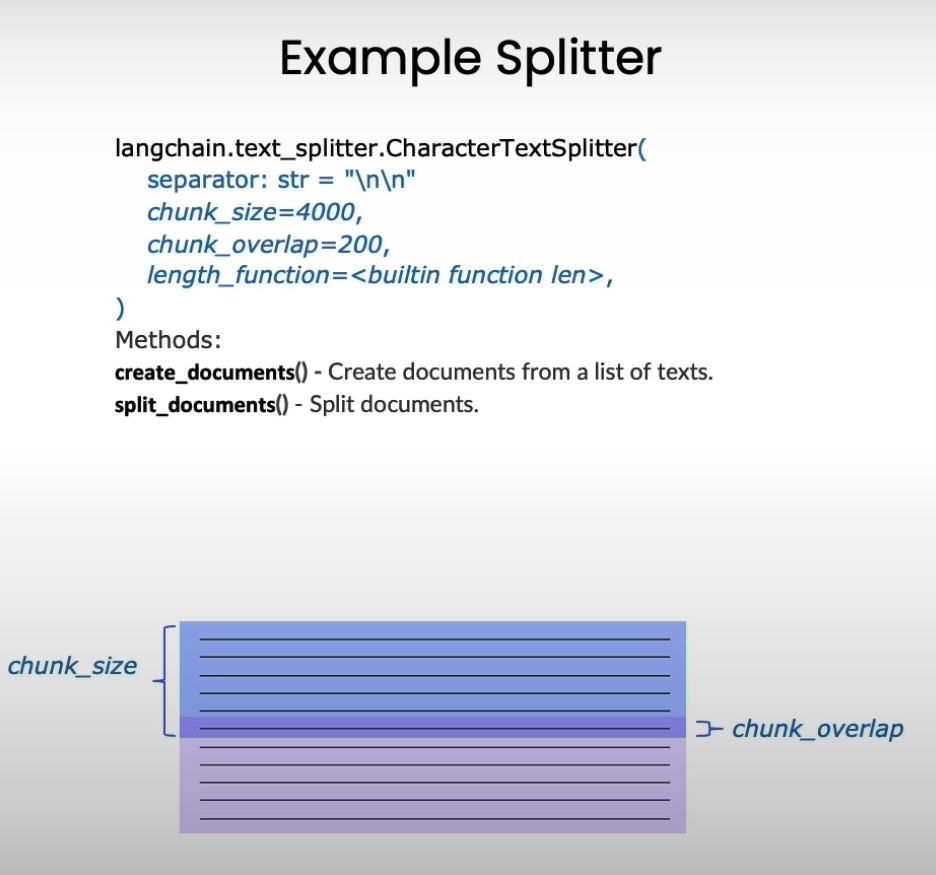

The basic principle of chunk splitting in LangChain involves dividing the document into chunks of a defined size with a specific chunk overlap. The chunk overlap ensures that there is some continuity between two different chunks split from the same source, preserving the context and relationships within the text.

### Types of Splitters

There are various types of text splitters available in LangChain. You can find more details in the [LangChain documentation](https://python.langchain.com/v0.1/docs/modules/data_connection/document_transformers/).

To install the necessary package, use:
```bash
pip install -qU langchain-text-splitters
```

Some of the most commonly used text splitters are:

- **CharacterTextSplitter()**: Splits text based on characters.
- **MarkdownHeaderTextSplitter()**: Splits markdown files based on specified headers.
- **TokenTextSplitter()**: Splits text based on tokens.
- **SentenceTransformersTokenTextSplitter()**: Splits text based on tokens using sentence transformers.
- **RecursiveCharacterTextSplitter()**: Splits text based on characters and recursively tries different characters to find the best split.
- **Language()**: Supports splitting for various languages like C++, Python, Ruby, Markdown, etc.
- **NLTKTextSplitter()**: Splits text into sentences using NLTK (Natural Language Toolkit).
- **SpacyTextSplitter()**: Splits text into sentences using SpaCy.

In [14]:
%pip install langchain-text-splitters -q

In [15]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_text_splitters import CharacterTextSplitter

In [16]:
CHUNK_SIZE = 26
CHUNK_OVERLAP = 4

In [17]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=CHUNK_SIZE,
    chunk_overlap=CHUNK_OVERLAP
)

### Default separator for Character text splitter is newline `\n`
c_splitter = CharacterTextSplitter(
    chunk_size=CHUNK_SIZE,
    chunk_overlap=CHUNK_OVERLAP
)

In [18]:
# doesnot split the text since its length is exactly 26
text1 = "abcdefghijklmnopqrstuvwxyz"
print("Total character in text1: ", len(text1))
r_splitter.split_text(text1)

Total character in text1:  26


['abcdefghijklmnopqrstuvwxyz']

In [19]:
# split the text since the character length is greater than 26
text2 = "abcdefghijklmnopqrstuvwxyzabcdefg"
print("Total character in text2: ", len(text2))
r_splitter.split_text(text2)

Total character in text2:  33


['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefg']

In [20]:
### Splitting by recursive Character Splitter
text3 = "a b c d e f g h i j k l m n o p q r s t u v w x y z"
print("Total character in text3: ", len(text3))
splitted_text3 = r_splitter.split_text(text3)

for i, chunk in enumerate(splitted_text3):
    print(f"Chunk {i+1} (Length: {len(chunk)}): {chunk}")

Total character in text3:  51
Chunk 1 (Length: 25): a b c d e f g h i j k l m
Chunk 2 (Length: 25): l m n o p q r s t u v w x
Chunk 3 (Length: 7): w x y z


In [21]:
#### Splitting by character Splitter
character_splitted_text3 = c_splitter.split_text(text3)

for i, chunk in enumerate(character_splitted_text3):
    print(f"Chunk {i+1} (Length: {len(chunk)}): {chunk}")

Chunk 1 (Length: 51): a b c d e f g h i j k l m n o p q r s t u v w x y z


In [22]:
# to get the same answer as recursive character splitter we have to specify the separater as ' '
c_splitter = CharacterTextSplitter(
    chunk_size=CHUNK_SIZE,
    chunk_overlap=CHUNK_OVERLAP,
    separator=' '
)
character_splitted_text3 = c_splitter.split_text(text3)

for i, chunk in enumerate(character_splitted_text3):
    print(f"Chunk {i+1} (Length: {len(chunk)}): {chunk}")

Chunk 1 (Length: 25): a b c d e f g h i j k l m
Chunk 2 (Length: 25): l m n o p q r s t u v w x
Chunk 3 (Length: 7): w x y z


### Suggested Text Separator: `RecursiveCharacterTextSplitter`

The `RecursiveCharacterTextSplitter` has the capability to receive a collection of separators as an input and determines the most suitable approach based on the context. Unlike the `CharacterTextSplitter`, which operates on a single separator (with `\n` being the default for newline), this splitter adapts dynamically to various separators.

In [23]:
some_text = """When writing documents, writers will use document structure to group content. \
This can convey to the reader, which idea's are related. For example, closely related ideas \
are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n  \
Paragraphs are often delimited with a carriage return or two carriage returns. \
Carriage returns are the "backslash n" you see embedded in this string. \
Sentences have a period at the end, but also, have a space.\
and words are separated by space."""

print("Length of original text: ", len(some_text))

Length of original text:  496


In [24]:
c_splitter = CharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0,
    separator = ' '
)
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0,
    # see the separator in order
    separators=["\n\n", "\n", " ", ""]
)

In [25]:
c_splitted_some_text = c_splitter.split_text(some_text)
for i, chunk in enumerate(c_splitted_some_text):
  print(f"Chunk {i+1} (Length: {len(chunk)}): {chunk}")

print("*"*25, "  rECUSIVE cHARACTER SPLITTER  ", "*"*25)
r_splitted_some_text = r_splitter.split_text(some_text)
for i, chunk in enumerate(r_splitted_some_text):
  print(f"Chunk {i+1} (Length: {len(chunk)}): {chunk}")


Chunk 1 (Length: 448): When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. 

 Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also,
Chunk 2 (Length: 46): have a space.and words are separated by space.
*************************   rECUSIVE cHARACTER SPLITTER   *************************
Chunk 1 (Length: 248): When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.
Chunk 2 (Length: 243): Paragraphs are often delimited with a carriage return or two carriage returns. C

### Careful with the splitter
```
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "\. ", " ", ""]
)
```
In this splitter, the sentence may be splitted in `.` which may breaks the meaning of sentence. `I am groot`. `. I live in marvel`.

In [26]:
#### TO NOT SPLIT THE PUNCTUATION
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "(?<=\. )", " ", ""]
)
r_splitted_some_text2 = r_splitter.split_text(some_text)

for i, chunk in enumerate(r_splitted_some_text2):
  print(f"Chunk {i+1} (Length: {len(chunk)}): {chunk}")


Chunk 1 (Length: 147): When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example,
Chunk 2 (Length: 100): closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.
Chunk 3 (Length: 142): Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this
Chunk 4 (Length: 100): string. Sentences have a period at the end, but also, have a space.and words are separated by space.


### Split from the PDF pages from above


In [27]:
print("Total PDF pages: ", len(pdf_pages))
text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=1000,
    chunk_overlap=150,
    length_function=len
)

pdf_split_docs = text_splitter.split_documents(pdf_pages)

print("Total chunk after splitting: ", len(pdf_split_docs))
print(">>> Page content: ", pdf_split_docs[0].page_content)


Total PDF pages:  11
Total chunk after splitting:  61
>>> Page content:  RAFT: Adapting Language Model to Domain Specific RAG
Tianjun Zhang Shishir G. Patil Naman Jain Sheng Shen Matei Zaharia Ion Stoica Joseph E. Gonzalez
tianjunz@berkeley.edu, shishirpatil@berkeley.edu
UC Berkeley
Abstract
Pretraining Large Language Models (LLMs) on
large corpora of textual data is now a standard
paradigm. When using these LLMs for many
downstream applications, it is common to ad-
ditionally bake in new knowledge (e.g., time-
critical news, or private domain knowledge) into
the pretrained model either through RAG-based-
prompting, or finetuning. However, the optimal
methodology for the model to gain such new
knowledge remains an open question. In this pa-
per, we present Retrieval Augmented Fine Tun-
ing (RAFT), a training recipe that improves the
model’s ability to answer questions in an "open-
book" in-domain setting. In RAFT, given a ques-
tion, and a set of retrieved documents, we train
the model

### Token Splitting

We can split text based on token count, which can be particularly useful since large language models (LLMs) often have context windows defined in tokens.

Typically, tokens are approximately 4 characters long.

In [30]:
from langchain_text_splitters import TokenTextSplitter

In [31]:
text_splitter = TokenTextSplitter(chunk_size=1,
                                  chunk_overlap=0)


text1 = "foo bar baxxyfoo"
text_splitter.split_text(text1)

['foo', ' bar', ' b', 'ax', 'xy', 'foo']

In [34]:
# make a chunk size litter bigger
text_splitter = TokenTextSplitter(chunk_size=10,
                                         chunk_overlap=0)

pdf_split_with_token = text_splitter.split_documents(pdf_pages)
pdf_split_with_token[0]

Document(page_content='RAFT: Adapting Language Model to Domain Specific R', metadata={'source': 'raft.pdf', 'page': 0})

### Context-Aware Splitting

Chunking aims to maintain the continuity of related text segments.

Text splitting commonly employs sentences or other delimiters to keep contextually related text together. However, many documents (such as markdown files) have a structure with headers that can be explicitly utilized in the splitting process.

We can use the `MarkdownHeaderTextSplitter` to preserve header metadata in our chunks, as demonstrated below.

In [35]:
from langchain_text_splitters import MarkdownHeaderTextSplitter

In [36]:
markdown_document = """# Title\n\n \
## Chapter 1\n\n \
Hi this is Jim\n\n Hi this is Joe\n\n \
### Section \n\n \
Hi this is Lance \n\n
## Chapter 2\n\n \
Hi this is Molly"""

In [37]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)

md_header_splits = markdown_splitter.split_text(markdown_document)
md_header_splits[0]

Document(page_content='Hi this is Jim  \nHi this is Joe', metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1'})